# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
try:
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior() 
    from tensorflow.compat.v1.layers import flatten
except:
    import tensorflow as tf
    from tensorflow.contrib.layers import flatten
tf.set_random_seed(0)
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

class_name = {}
with open('signnames.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    headline = True
    for row in spamreader:
        if headline:
            headline = False
            continue
        class_name[int(row[0])] = row[1]



Instructions for updating:
non-resource variables are not supported in the long term


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import random
np.random.seed(0)
random.seed(0)

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max() + 1# Alternative numpy.unique 

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

41


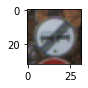

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

image = X_train[80].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[80])

<Figure size 432x288 with 0 Axes>

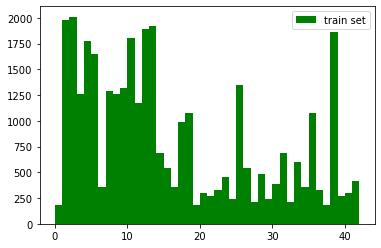

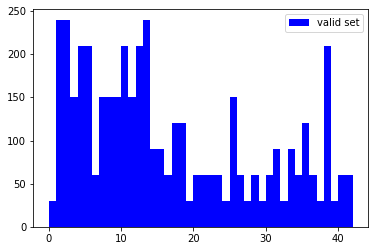

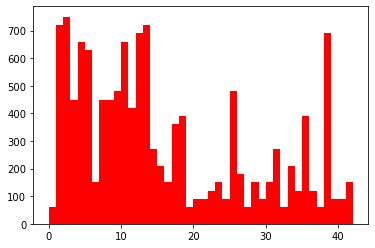

<Figure size 432x288 with 0 Axes>

In [4]:
counts, bins = np.histogram(y_train, bins=[i for i in range(0, n_classes)])
plt.hist(bins[:-1], bins, weights=counts, label='train set', color='g')
plt.legend()

plt.figure()

counts, bins = np.histogram(y_valid, bins=[i for i in range(0, n_classes)])
plt.hist(bins[:-1], bins, weights=counts,  label='valid set', color='b')
plt.legend()

plt.figure()

counts, bins = np.histogram(y_test, bins=[i for i in range(0, n_classes)])
plt.hist(bins[:-1], bins, weights=counts, label='test set', color='r')
plt.figure()

#print(dict(zip(bins, counts)))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

**Generate Fake Data**

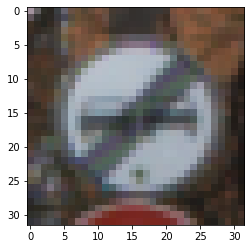

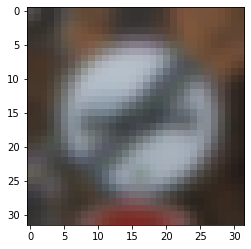

In [5]:
import cv2
def add_blur(img):
    #shape = img.shape
    #gauss = np.random.normal(0,0.5,img.size)
    #gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    #return cv2.add(img, gauss)
    return cv2.GaussianBlur(img, (5, 5), 0)
    

img= X_train[80]
noise_img = add_blur(img)
plt.imshow(img)
plt.figure()
plt.imshow(noise_img)

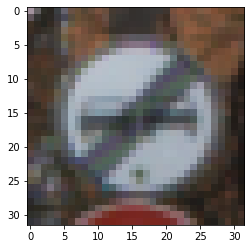

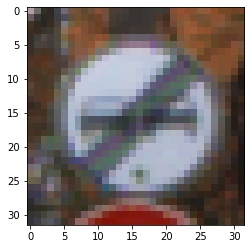

In [6]:
def color_agumentation(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) 
    hsv = np.array(hsv, dtype=np.float64)
    for i in range (0,3):
        hsv[:, :, i ] = hsv[:, :, i ] * (0.5 + np.random.uniform()) 
        hsv[:, :, i ][hsv[:, :, i ] > 255] = 255 
    rgb = cv2.cvtColor(np.array(hsv, dtype=np.uint8), cv2.COLOR_HSV2RGB)
    
    return rgb
        
img= X_train[80]
plt.imshow(img)
plt.figure()
with tf.Session() as sess:
    color_agu = color_agumentation(img)
plt.imshow(color_agu)


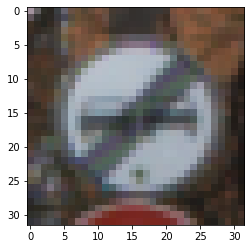

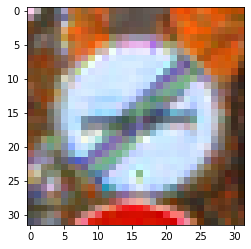

In [7]:
def brightness(img):
    value = random.uniform(0.6, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

img= X_train[80]
plt.imshow(img)
plt.figure()
bright = brightness(img)
    
plt.imshow(bright)

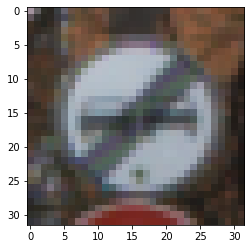

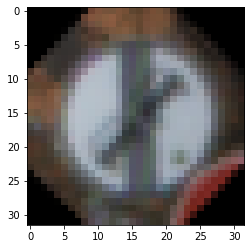

In [8]:
import random


def rotate(img ):
    angle = int(random.uniform(-90, 90))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

def flip(img):
    return cv2.rotate(img, cv2.ROTATE_180)
    
img= X_train[80]

plt.imshow(img)
plt.figure()
rotate_img = rotate(img)
plt.imshow(rotate_img)

In [9]:
X_append = []
y_append = []
total = len(X_train)
p=0
for i in range(total):
    if ((i/total)*100)>p:
        p+=10
        print("procent done: "+str(p))
    img = X_train[i]
    rotate_img = rotate(img)
    X_append.append(rotate_img)
    y_append.append(y_train[i])
    
    
    flip_img = flip(img)
    X_append.append(flip_img)
    y_append.append(y_train[i])

    brightness_img = brightness(img)
    X_append.append(brightness_img)
    y_append.append(y_train[i])

    color_img= color_agumentation(img)
    X_append.append(color_img)
    y_append.append(y_train[i])

    blur_img = add_blur(img)
    X_append.append(blur_img)
    y_append.append(y_train[i])
    
    """all_img = add_blur(brightness(color_agumentation(img)))
    X_append.append(all_img)
    y_append.append(y_train[i])"""


X_train = np.vstack((X_train, X_append)) 
y_train = np.hstack((y_train, y_append)) 

procent done: 10
procent done: 20
procent done: 30
procent done: 40
procent done: 50
procent done: 60
procent done: 70
procent done: 80
procent done: 90
procent done: 100


In [10]:
def normalize(X):
    return (X-128)/128

#https://arxiv.org/pdf/1812.01187.pdf
"""Normalize RGB channels by subtracting 123.68,
116.779, 103.939 and dividing by 58.393, 57.12,
57.375, respectively.
"""
def normalizeVgg(X):
    x = X - np.array([123.68, 116.779, 103.939]) #<- thats is enough for good result
    #x = x/ np.array([58.393, 57.12, 57.375]) 
    return x
#
#run one time

X_train = normalizeVgg(X_train)
X_test = normalizeVgg(X_test)
X_valid = normalizeVgg(X_valid)

In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


#print (tf.config.list_physical_devices())
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print(physical_devices)
EPOCHS = 25
BATCH_SIZE = 64

In [13]:


def relu(layer, name=None):
    return tf.nn.relu(layer, name=name)

def dropout(layer, rate=0.5, seed=None, name=None):
    return tf.nn.dropout(layer,rate, seed = seed, name=name)

def softmax(layer, name=None):
    return tf.nn.softmax(layer, name=name)

def max_pool(layer, ksize=[1,2,2,1], strides=[1,2,2,1],padding='VALID'):
    return tf.nn.max_pool(layer,
        ksize=ksize,
        strides=strides,
        padding='VALID')

def activation(layer, activ,  name=None):
    if activ == 'relu':
        return relu(layer, name=name)
    if activ == 'softmax':
        return softmax(layer, name=name)
    if activ == 'skip':
        return layer
    raise RuntimeError('Activation layer not implemented: '+ activation)
    
def conv(layer, shape, mean, sttdev, strides=[1, 1, 1, 1], activ='relu',padding='VALID', name=None):
    conv_W = tf.Variable(tf.truncated_normal(shape=shape, mean = mean, stddev = sttdev))
    conv_B = tf.Variable(tf.zeros(shape[-1]))
    conv   = tf.nn.conv2d(layer, conv_W, strides=strides, padding=padding) + conv_B
    return activation(conv, activ,  name=name) 

def full_connect(layer, shape, mean, stddev, activ='relu'):
    fc_W = tf.Variable(tf.truncated_normal(shape=shape, mean = mean, stddev = stddev))
    fc_b = tf.Variable(tf.zeros(shape[-1]))
    fc   = tf.matmul(layer, fc_W) + fc_b
    return activation(fc, activ)

#not used
def inception(layer, in_channels, filter_count,  mean, sttdev): 
    one = conv(layer, shape=[1, 1, in_channels, filter_count], mean = mean, sttdev = sttdev, activ='skip', padding='SAME')
    three= conv(layer, shape=[3, 3, in_channels, filter_count], mean = mean, sttdev = sttdev, activ='skip', padding='SAME' )
    five = conv(layer, shape=[5, 5, in_channels, filter_count], mean = mean, sttdev = sttdev, activ='skip', padding='SAME')
    # avg pooling
    pooling = tf.nn.avg_pool(layer, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    layer = tf.concat([one, three, five, pooling], axis=3)
    return activation(layer,'relu')

In [14]:

def LeNet(x):    
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = conv(x,shape= (5, 5, 3, 6) , mean = mu, sttdev = sigma, activ='relu'  )

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = max_pool(conv1)
        
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv(pool1, shape= (5, 5, 6, 16) , mean = mu, sttdev = sigma, activ='relu'  )

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = max_pool(conv2, ksize=[1,2,2,1])

    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(pool2)
    
    #Layer 3: Fully Connected. Input = 400. Output = 200.
    fc1   = full_connect(flat, shape=(400, 120), mean = mu, stddev = sigma, activ='relu')
    
    #dp1 = dropout(fc1, rate = 0.5, seed=1)
    #Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2   =  full_connect(fc1, shape=(120, 84), mean = mu, stddev = sigma, activ='relu' )
    #dp2 = dropout(fc2, rate = 0.5, seed=1)
    #Layer 5: Fully Connected. Input = 84. Output = n_classes.//n_classes = 42
    logits = full_connect(fc2, shape=(84, n_classes), mean = mu, stddev = sigma, activ='relu' )
    
    return logits

def VggNet_Small(x, keep_prob_dropout):
    with tf.name_scope('', "model", [x] ):
        mu = 0
        sigma = 0.1

        conv1_1 = conv(x,shape= (3, 3, 3, 16) , mean = mu, sttdev = sigma, activ='relu', padding='SAME', name='conv1_1')
        #print(conv1_1.get_shape())
        conv1_2 = conv(conv1_1,shape= (3, 3, 16,32), mean = mu, sttdev = sigma, activ='relu', padding='SAME', name='conv1_2')
        #print(conv1_2.get_shape())
        pool1 = max_pool(conv1_2,padding='SAME')
        #print(pool1.get_shape())
        
        conv2_1 = conv(pool1,shape= (3, 3, 32, 64), mean = mu, sttdev = sigma, activ='relu', padding='SAME', name='conv2_1')
        #print(conv2_1.get_shape())
        conv2_2 = conv(conv2_1,shape= (3, 3, 64, 64),mean = mu, sttdev = sigma, activ='relu', padding='SAME', name='conv2_2')
        #print(conv2_2.get_shape())
        pool2 = max_pool(conv2_2,padding='SAME')
        #print(pool2.get_shape())
        
        conv3_1 = conv(pool2,shape= (3, 3, 64, 64),  mean = mu, sttdev = sigma, activ='relu', padding='SAME', name='conv3_1')
        #print(conv3_1.get_shape())
        #conv3_2 = conv(conv3_1,shape= (3, 3, 64, 64), mean = mu, sttdev = sigma, activ='relu', padding='SAME')
        #conv3_3 = conv(conv3_2,shape= (3, 3, 64, 64),  mean = mu, sttdev = sigma, activ='relu', padding='SAME')
        pool3 = max_pool(conv3_1,padding='SAME')
        
        #print(pool3.get_shape())
        flat = flatten(pool3)
        #print(flat.get_shape())
        dp1 = dropout(flat, rate = keep_prob_dropout, seed=1)
        fc1 = full_connect(dp1, shape=(flat.get_shape().as_list()[-1], 120), mean = mu, stddev = sigma, activ='relu')
        fc3 = full_connect(fc1, shape=(120, n_classes), mean = mu, stddev = sigma, activ='relu')
    return fc3

    

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob_dropout = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
rate = 0.00095

logits= VggNet_Small(x, keep_prob_dropout)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_dropout:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    accuracy = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_dropout:0.4})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        accuracy.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './VggNet_Small')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.633

EPOCH 2 ...
Validation Accuracy = 0.886

EPOCH 3 ...
Validation Accuracy = 0.924

EPOCH 4 ...
Validation Accuracy = 0.915

EPOCH 5 ...
Validation Accuracy = 0.930

EPOCH 6 ...
Validation Accuracy = 0.928

EPOCH 7 ...
Validation Accuracy = 0.922

EPOCH 8 ...
Validation Accuracy = 0.924

EPOCH 9 ...
Validation Accuracy = 0.918

EPOCH 10 ...
Validation Accuracy = 0.922

EPOCH 11 ...
Validation Accuracy = 0.923

EPOCH 12 ...
Validation Accuracy = 0.928

EPOCH 13 ...
Validation Accuracy = 0.932

EPOCH 14 ...
Validation Accuracy = 0.931

EPOCH 15 ...
Validation Accuracy = 0.929

EPOCH 16 ...
Validation Accuracy = 0.926

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 19 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.928

EPOCH 22 ...
Validation Accuracy = 0.932

EPOCH 23 ...
Validation Accuracy = 0.922

EPOCH 24 ...
Validation Accura

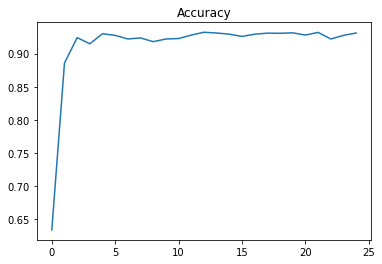

In [19]:
plt.plot(accuracy)
plt.title("Accuracy")
plt.show()

In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    validation_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\VggNet_Small
Train Accuracy = 0.935
Validation Accuracy = 0.931
Test Accuracy = 0.930


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

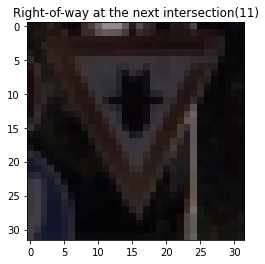

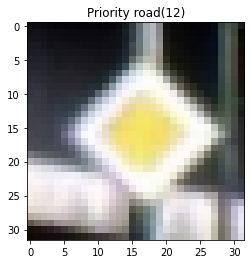

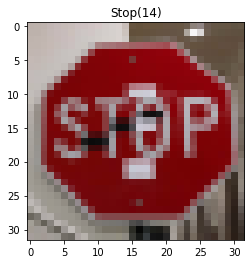

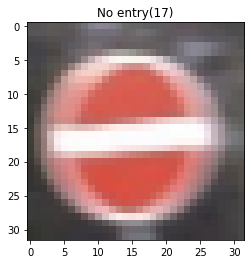

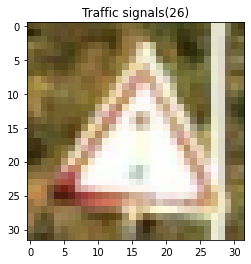

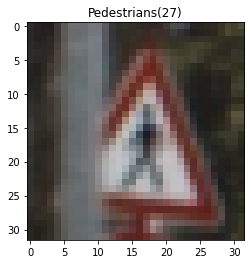

<Figure size 432x288 with 0 Axes>

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import matplotlib.image as mpimg
files = glob.glob('trafic_signs\*.jpg')
prefix = len("trafic_signs\\")
suffix = 4
X_new = []
Y_new = []
for filename in files:
    image = cv2.resize(mpimg.imread(filename), (32,32), interpolation=cv2.INTER_AREA) 
    X_new.append(image)
    #np.vstack((X_new, image)) 
    Y_new.append(int(filename[prefix:-suffix]))
    plt.imshow(image)
    plt.title(class_name[Y_new[-1]]+'('+str(Y_new[-1])+')')
    plt.figure()
X_new_copy = X_new
X_new = np.array(X_new) 
X_new = normalizeVgg(X_new)


### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

soft_max = tf.nn.softmax(logits)
top5 = tf.nn.top_k(soft_max, 5)

with tf.Session() as sess:
    saver.restore(sess, './VggNet_Small')
    #sess.run(tf.nn.top_k(tf.constant(a), k=3))
    predictions = sess.run(top5, feed_dict={x: X_new, y: Y_new,  keep_prob_dropout:1.0 })


INFO:tensorflow:Restoring parameters from ./VggNet_Small


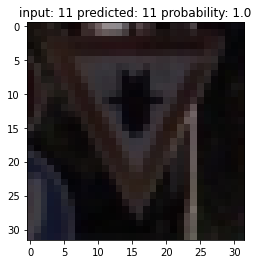

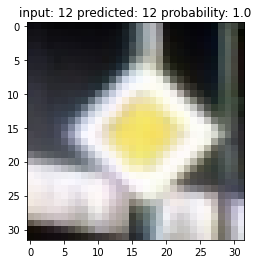

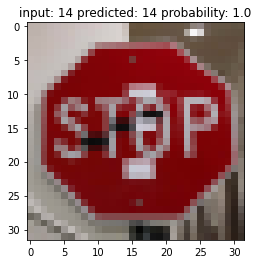

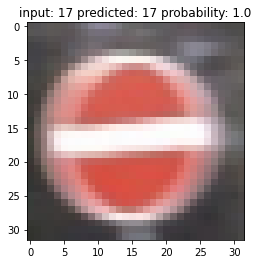

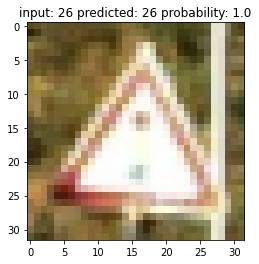

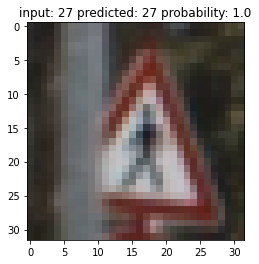

<Figure size 432x288 with 0 Axes>

In [23]:
for i in range(X_new.shape[0]):
    plt.imshow(X_new_copy[i])
    predict = predictions[1][i][0]
    prob = round(predictions[0][i][0],4)
    plt.title('input: '+str(Y_new[i])+ ' predicted: '+str(predict)+' probability: '+str(prob))
    plt.figure()
    #print(predict)
    #plt.bar(np.arange(n_classes), my_softmax_logits) 
    


### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_new, Y_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\VggNet_Small
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

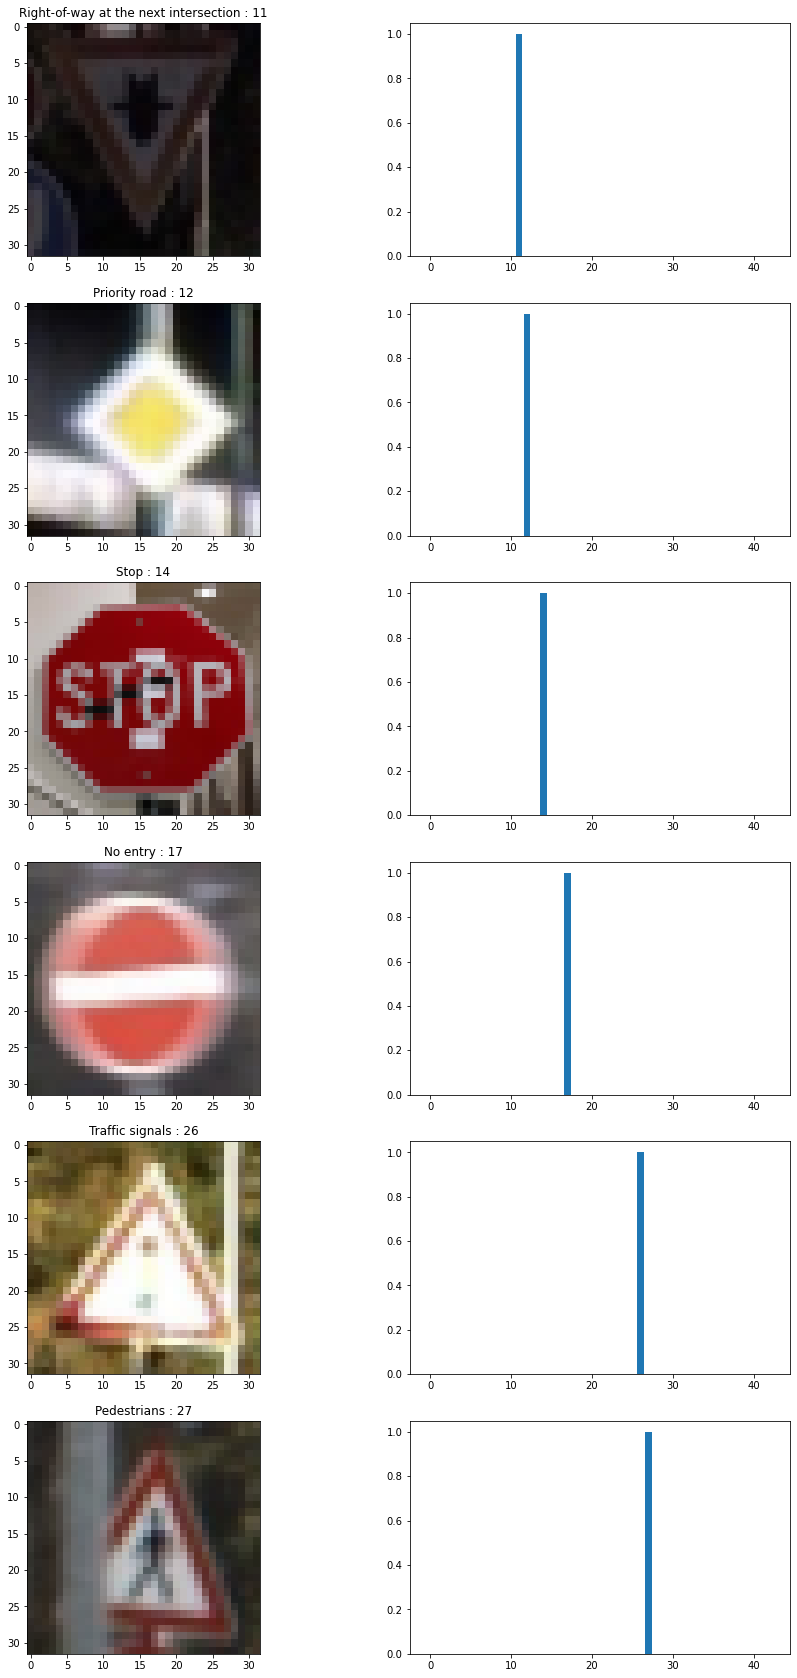

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

fig, axs = plt.subplots(X_new.shape[0],2, figsize=(15, 30))
axs = axs.ravel()
for i in range(X_new.shape[0]):
    axs[i*2].imshow(X_new_copy[i])
    axs[i*2].set_title(class_name[Y_new[i]]+" : "+str(Y_new[i]))
    p = [0 for j in range(0, n_classes)]
    
    for j in range(5):
        p[predictions[1][i][j]] = predictions[0][i][j]
        
    axs[i*2+1].bar(np.arange(n_classes),p)
    #predict = predictions[1][i][0]
    #plt.title(class_name[Y_new[i]])
    #axs.figure()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from .\VggNet_Small
First convolutional layer
Second convolutional layer


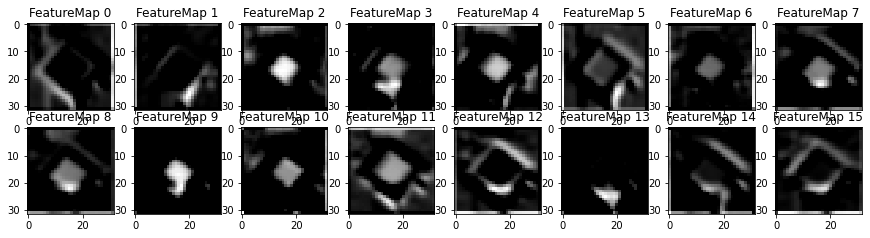

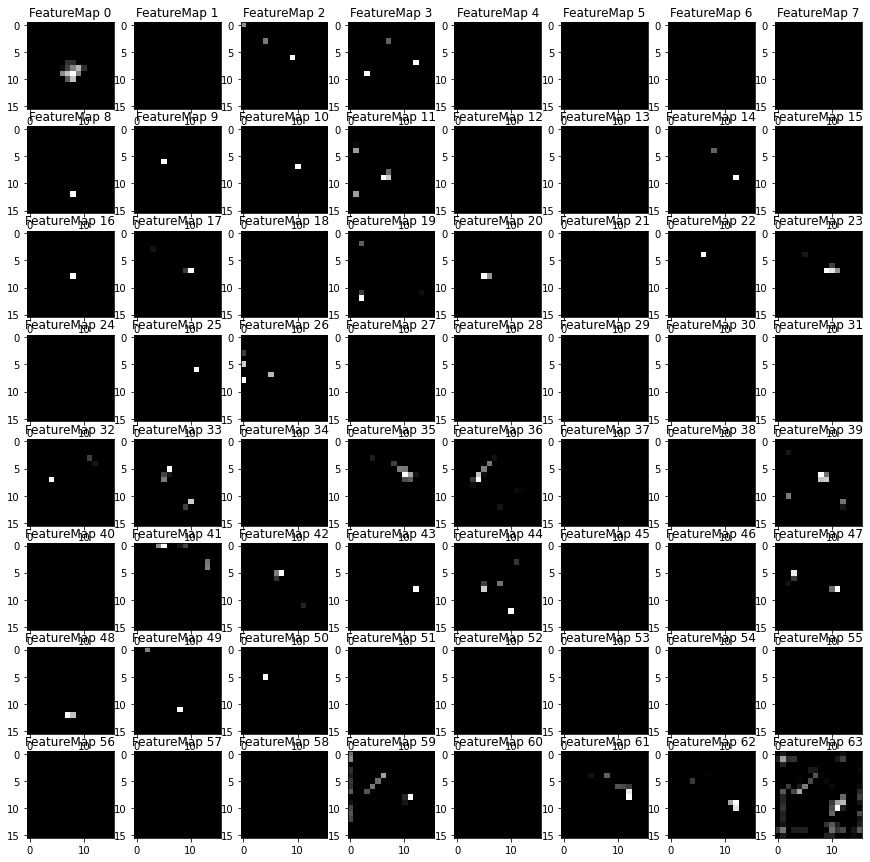

In [26]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function

    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob_dropout:1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max,cmap="gray" )
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    current_graph = tf.compat.v1.get_default_graph()
    all_names = [op.name for op in current_graph.get_operations()]
    #print(all_names)
    random_image = X_train[None,-2,:,:]
    #random_image = np.array(random_image).reshape(1, 32,32,3)
 
    print('First convolutional layer')
    conv1 = sess.graph.get_tensor_by_name('conv1_1:0')
    outputFeatureMap(random_image, conv1, plt_num=1)
    conv3 = sess.graph.get_tensor_by_name('conv2_2:0')
    print('Second convolutional layer')
    outputFeatureMap(random_image, conv3, plt_num=2)

# **Traffic Sign Recognition** 

## Writeup

### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/visualization1.png "Visualization 1"
[image9]: ./examples/visualization2.png "Visualization 2"
[image10]: ./examples/visualization3.png "Visualization 3"

[image2]: ./examples/grayscale.jpg "Grayscaling"
[image3]: ./examples/random_noise.jpg "Random Noise"
[image4]: ./trafic_signs/11.jpg "Traffic Sign 1"
[image5]: ./trafic_signs/12.jpg "Traffic Sign 2"
[image6]: ./trafic_signs/17.jpg "Traffic Sign 3"
[image7]: ./trafic_signs/26.jpg "Traffic Sign 4"
[image8]: ./trafic_signs/27.jpg "Traffic Sign 5"

[image12]: ./trafic_signs/14.jpg "Traffic Sign 6"
[image11]: ./examples/predictions_2.png "Predicitions"

[image13]: ./examples/network.jpg "Network"

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code](https://github.com/waszak/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.


* The size of training set is 34799 samples 
* The size of the validation set is 4410 samples
* The size of test set is 12630 samples
* The shape of a traffic sign image is  (32, 32, 3)
* The number of unique classes/labels in the data set is 43

#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a histogram of representation of classes in trainining, validation and test dataset. The distribution is the same which is good. 

![alt text][image1]
![alt text][image9]
![alt text][image10]

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step I decided to add more data because some classes had less than 200 examples. I used rotation, brigthness, color_agumentation and blur. For every image i aplied all this operations. With elements of randomness just to be safe.
I used VGG-16 normalization because it worked the best.






#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 3x3     	| 1x1 stride, same padding, outputs 16x32x32 	|
| RELU					|												|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 32x32x32 	|
| RELU					|												|
| Max pooling	      	| 2x2x1 stride,  outputs 16x16x32 				|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 16x16x64 	|
| RELU					|												|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 16x16x64 	|
| RELU					|												|
| Max pooling	      	| 2x2x1 stride,  outputs 16x16x64 				|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 8x8x64  	|
| RELU					|												|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 8x8x64  	|
| RELU					|												|
| Max pooling	      	| 2x2x1 stride,  outputs 4x4x64   				|
| Flatten				| ouputs 1x1024									|
| Dropout       	    | keep probabilty 50%      						|
| Fully connected		| 120       									|
| RELU					|												|
| Fully connected		| 42        									|
| RELU					|												|
| Sotmax				| 42 (one-hot= number of classes			    |
 
![alt text][image13]

#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used an Adam Optimizer with learning rate 0.0001, I had 20 epochs and batch size was 128.

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* Train Accuracy = 0.935
* Validation Accuracy = 0.931
* Test Accuracy = 0.930
I actually manage to get even more 95+ but it had issues with Stop sign and Flipped images so it got like 67% of new images right. With addition of them it managed to get to 93-94 (its harder to get that accuracy) but it had no issue with Stop Sign.

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?
LaNet because we used it class
* What were some problems with the initial architecture?
    - It wasn't very good on its own. It had low accuracy. Image agumentation helped, and using normalization also improved performance. I also didn't like that it used grayscale. Changing this network to use 3 channels was not hard but network seems to small to learn well.
* How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to overfitting or underfitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.
    + I used Vgg-16 but i adjusted it slightly for 32x32x3 images and removed a lot of layers.
* Which parameters were tuned? How were they adjusted and why?
    + Batch size, Learning rate was adjusted to improve learning, also drop rate. Learning rate was adjusted to train sligthly  slower but more accurate. Batch size to maximize my hardware for training and get good accuracy. Drop rate to regularize more network to prevent overffiting. 
* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?
    + Dropout layer helped to reguralize my network

If a well known architecture was chosen:
* What architecture was chosen?
    + My architecture was slimmed version of VGG-16 with few changes. I tried LaNet but it didn't learn well on my agumented images. It was trained from 0. So 
* Why did you believe it would be relevant to the traffic sign application?
    + It was newer and bigger network.I could simplify it for my needs.


### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

First image is dark and its upside down.
![alt text][image4] 

Second image is pixelated.
![alt text][image5]

Third image is blured.
![alt text][image6] 

Forth image is too bright and some details are not visible
![alt text][image7] 

Part of fith image is hidden
![alt text][image8]

Sixth image also has part of image hidden
![alt text][image12]

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Right-of-way at the next intersection  | Right-of-way at the next intersection		| 
| Priority road     			         | Priority road     							|
| No entry					             | No entry		    							|
| Traffic signals	      		         | raffic signals				 				|
| Road narrows on the right		         | Road narrows on the right					|
| Stop sign		         | Stop sign						|


The model was able to correctly guess 6 of the 6 traffic signs, which gives an accuracy of 100%.
W

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 22th cell of the Ipython notebook.
My predictions are 100% certain. Before adding rotated/flipped images it was 83.33% because it had issues with stop sign.
![alt text][image11] 

### (Optional) Visualizing the Neural Network (See Step 4 of the Ipython notebook for more details)
#### 1. Discuss the visual output of your trained network's feature maps. What characteristics did the neural network use to make classifications?


